In [1]:
import pandas as pd

file_path = "15.01 Tr. 6 Export for Patryk Kusztal 45648.csv"

# Ponownie wczytam plik, analizując jego zawartość, aby znaleźć odpowiedni wiersz nagłówków
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Znalezienie wiersza nagłówka (pierwszy wiersz zawierający "Velocity" jako kolumnę)
header_line = next(i for i, line in enumerate(lines) if "Velocity" in line)

# Wczytanie pliku od linii nagłówka
df = pd.read_csv(file_path, skiprows=header_line, sep=';', decimal=',')

# Podgląd pierwszych wierszy, aby sprawdzić poprawność wczytania
df.head()



,Timestamp,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,Positional Quality (%),HDOP,#Sats
0,15.01.2025 18:05,0.0,1.42,-0.122217,0.00,36.889434,31.051139,0,0.0,70.5,0.78,14
1,15.01.2025 18:05,0.1,1.94,0.087716,0.12,36.889435,31.051140,0,0.0,72.0,0.78,14
2,15.01.2025 18:05,0.2,2.40,0.328711,0.24,36.889435,31.051141,0,0.0,69.9,0.78,14
3,15.01.2025 18:05,0.3,2.78,0.558277,0.34,36.889436,31.051142,0,0.0,71.0,0.78,14
4,15.01.2025 18:05,0.4,3.07,0.745226,0.49,36.889437,31.051142,0,0.1,71.4,0.78,14


In [6]:
import pandas as pd

# Wczytanie pliku CSV (zamień 'plik.csv' na właściwą ścieżkę)
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Odczytanie daty eksportu (pierwszy wiersz) i usunięcie godziny
export_date = " ".join(lines[0].split(":")[1].strip().split()[:1])  # Pobiera tylko część z datą

# Odczytanie nazwy atlety (siódmy wiersz) i usunięcie zbędnych średników
athlete_name = lines[7].split(":")[1].strip().replace('"', '').split(";")[0]

print(f"Data eksportu: {export_date}")
print(f"Nazwa atlety: {athlete_name}")




Data eksportu: 16.01.2025
Nazwa atlety: Kusztal


In [9]:
import os 
folder_path="Przykladowy Folder"
# Pobranie listy plików CSV w folderze
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

if not csv_files:
    print("Brak plików CSV w podanym folderze.")
    exit()

all_results = []
# Iteracja po wszystkich plikach CSV i przetwarzanie ich
for file_number, file in enumerate(csv_files, start=1):
    file_path = os.path.join(folder_path, file)
    print(f"Przetwarzanie pliku {file_number}/{len(csv_files)}: {file}")

    # Wczytanie pliku CSV (zamień 'plik.csv' na właściwą ścieżkę)
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()

    # Odczytanie daty eksportu (pierwszy wiersz) i usunięcie godziny
    export_date = " ".join(lines[0].split(":")[1].strip().split()[:1])  # Pobiera tylko część z datą

    # Odczytanie nazwy atlety (siódmy wiersz) i usunięcie zbędnych średników
    athlete_name = lines[7].split(":")[1].strip().replace('"', '').split(";")[0]

    print(f"Data eksportu: {export_date}")
    print(f"Nazwa atlety: {athlete_name}")

   


Przetwarzanie pliku 1/4: 15 sty Tr. 5 Export for Patryk Kusztal 45648.csv
Data eksportu: 19.01.2025
Nazwa atlety: Kusztal
Przetwarzanie pliku 2/4: 18.01 Regeneracja_Finalizacja 2x15 m in Export for Patryk Kusztal 45648.csv
Data eksportu: 19.01.2025
Nazwa atlety: Kusztal
Przetwarzanie pliku 3/4: 2nd 1 Export for Patryk Kusztal 45648.csv
Data eksportu: 19.01.2025
Nazwa atlety: Kusztal
Przetwarzanie pliku 4/4: Activity 20250116110007 Export for Patryk Kusztal 45648.csv
Data eksportu: 19.01.2025
Nazwa atlety: Kusztal


In [2]:
def compute_future_mean(series, window=7):
    return [series[i:i+window].mean() if i+window <= len(series) else None for i in range(len(series))]

df['Acceleration_SMA'] = compute_future_mean(df['Acceleration'], window=7)



In [2]:
# Obliczenie średniej ruchomej (każda obserwacja + 4 kolejne wartości)
#df['Velocity_SMA'] = df['Velocity'].rolling(window=5, min_periods=1).mean()
#df['Acceleration_SMA'] = df['Acceleration'].rolling(window=5, min_periods=1).mean()

# Grupowanie danych według przedziałów prędkości i wybór 5 największych przyspieszeń
bins = range(0, int(df['Velocity_SMA'].max()) + 2)  # Przedziały 0-1, 1-2, ..., max_velocity+1
df['Velocity_Bin'] = pd.cut(df['Velocity_SMA'], bins=bins, right=False)

# Znalezienie 5 największych wartości przyspieszenia dla każdego przedziału prędkości
top_acceleration_by_bin = df.groupby('Velocity_Bin').apply(
    lambda x: x.nlargest(5, 'Acceleration_SMA')[['Timestamp','Seconds', 'Velocity_SMA', 'Acceleration_SMA']]
).reset_index(drop=True)


top_acceleration_by_bin.to_excel('wyniki.xlsx')

C:\Users\00tim351\AppData\Local\Temp\ipykernel_18840\2726668530.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_acceleration_by_bin = df.groupby('Velocity_Bin').apply(
C:\Users\00tim351\AppData\Local\Temp\ipykernel_18840\2726668530.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_acceleration_by_bin = df.groupby('Velocity_Bin').apply(


In [9]:
import pandas as pd

# Obliczenie średniej ruchomej (każda obserwacja + 4 kolejne wartości)
#df['Velocity_SMA'] = df['Velocity'].rolling(window=5, min_periods=1).mean()
#df['Acceleration_SMA'] = df['Acceleration'].rolling(window=5, min_periods=1).mean()

    # Definiowanie dynamicznych przedziałów prędkości co 5 jednostek
max_velocity = df['Velocity'].max()
bins = list(range(0, int(max_velocity) + 6, 5))  # Przedziały co 5
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df['Velocity_Bin'] = pd.cut(df['Velocity'], bins=bins, labels=labels, right=False)

# Znalezienie wszystkich wartości przyspieszenia dla każdej grupy z warunkiem minimalnej odległości 1s
def filter_by_time_gap(group):
    selected = []
    top_n = 10  # Początkowa liczba wybranych wartości
    while len(selected) < 10:
        candidates = group.nlargest(top_n, 'Acceleration_SMA')  # Pobieramy dynamicznie rosnącą liczbę wyników
        selected = []
        for _, row in candidates.iterrows():
            if not selected or all(abs(row['Seconds'] - prev['Seconds']) >= 1 for prev in selected):
                selected.append(row)
            if len(selected) == 10:
                break
        top_n += 5  # Zwiększamy liczbę wybieranych kandydatów, jeśli nie osiągnęliśmy 10 obserwacji
        if top_n > len(group):  # Jeśli już nie mamy więcej danych, przerywamy pętlę
            break
    return pd.DataFrame(selected)

top_acceleration_by_bin = (
    df.groupby('Velocity_Bin', group_keys=False)
    .apply(filter_by_time_gap)
    .sort_values(by=['Velocity_Bin', 'Seconds'])
    .reset_index(drop=True)[['Timestamp', 'Seconds', 'Velocity', 'Acceleration_SMA', 'Velocity_Bin']]
)
# Zapis wyników do pliku
#top_acceleration_by_bin.to_excel('wyniki.xlsx', index=False)

C:\Users\00tim351\AppData\Local\Temp\ipykernel_16848\2995282399.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Velocity_Bin', group_keys=False)
C:\Users\00tim351\AppData\Local\Temp\ipykernel_16848\2995282399.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(filter_by_time_gap)


In [10]:
top_acceleration_by_bin.groupby('Velocity_Bin')['Acceleration_SMA'].mean().reset_index()

,Velocity_Bin,Acceleration_SMA
0,0-5,1.853781
1,10-15,3.070944
2,15-20,2.729828
3,20-25,1.322973
4,25-30,0.342489
5,5-10,2.697832


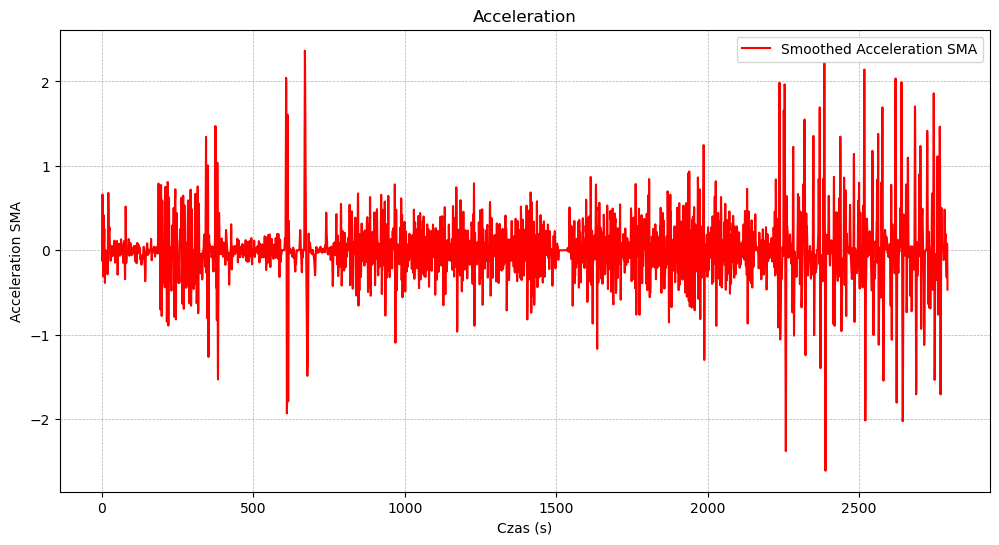

In [36]:
import matplotlib.pyplot as plt

# Tworzenie wykresu
plt.figure(figsize=(12, 6))  # Zwiększenie rozmiaru wykresu


# Dodanie średniej kroczącej dla wygładzenia wykresu (rolling window = 20)
df['Acceleration_SMA_Smooth'] = df['Acceleration_SMA'].rolling(window=20, min_periods=1).mean()
plt.plot(df['Seconds'][::5], df['Acceleration_SMA_Smooth'][::5], label='Smoothed Acceleration SMA', color='red', linewidth=1.5)

# Opisy osi i tytuł
plt.xlabel('Czas (s)')
plt.ylabel('Acceleration SMA')
plt.title('Acceleration')

# Dodanie siatki dla lepszej czytelności
plt.grid(True, linestyle='--', linewidth=0.5)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()


In [50]:
# Obliczenie średniej ruchomej (każda obserwacja + 4 kolejne wartości)
df['Velocity_SMA'] = df['Velocity'].rolling(window=5, min_periods=1).mean()
df['Acceleration_SMA'] = df['Acceleration'].rolling(window=5, min_periods=1).mean()

In [55]:
df[df['Acceleration_SMA']==df['Acceleration_SMA'].max()]
df[df['Acceleration']==df['Acceleration'].max()]

,Timestamp,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,Positional Quality (%),HDOP,#Sats,Velocity_SMA,Acceleration_SMA
23842,15.01.2025 18:45,2384.2,18.38,4.170514,2144.85,36.88977,31.051427,0,260.1,65.8,0.65,16,16.378,3.538232


In [48]:
df[df['Acceleration_SMA']==df['Acceleration_SMA'].max()]

,Timestamp,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,Positional Quality (%),HDOP,#Sats,Velocity_SMA,Acceleration_SMA,Velocity_Bin,Acceleration_SMA_Smooth
0,15.01.2025 18:05,0.0,1.42,-0.122217,0.00,36.889434,31.051139,0,0.0,70.5,0.78,14,1.420,3.994411,0-5,-0.122217
1,15.01.2025 18:05,0.1,1.94,0.087716,0.12,36.889435,31.051140,0,0.0,72.0,0.78,14,1.680,3.994411,0-5,-0.069733
2,15.01.2025 18:05,0.2,2.40,0.328711,0.24,36.889435,31.051141,0,0.0,69.9,0.78,14,1.920,3.994411,0-5,-0.013799
3,15.01.2025 18:05,0.3,2.78,0.558277,0.34,36.889436,31.051142,0,0.0,71.0,0.78,14,2.135,3.994411,0-5,0.042931
4,15.01.2025 18:05,0.4,3.07,0.745226,0.49,36.889437,31.051142,0,0.1,71.4,0.78,14,2.322,3.994411,0-5,0.098254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27925,15.01.2025 18:52,2792.5,5.76,1.077666,2886.12,36.889498,31.051310,0,338.6,67.6,0.65,16,6.578,3.994411,5+,-0.467241
27926,15.01.2025 18:52,2792.6,4.65,0.784216,2886.14,36.889499,31.051310,0,338.6,66.0,0.65,16,6.220,3.994411,5+,-0.463499
27927,15.01.2025 18:52,2792.7,3.48,0.295615,2886.20,36.889498,31.051310,0,338.6,66.0,0.65,16,5.516,3.994411,5+,-0.456332
27928,15.01.2025 18:52,2792.8,2.32,-0.299095,2886.29,36.889497,31.051310,0,338.7,69.8,0.65,16,4.566,3.994411,0-5,-0.453430
